# The Fama-French 5 Factor Model

In [64]:
import os

import pandas as pd
import numpy as np

In [65]:
TICKER_PATH = '../indices/'

START_DATE = '2000-01-01'
END_DATE = '2019-12-31'

if not os.path.isdir(TICKER_PATH) or len(os.listdir(TICKER_PATH)) == 0:
    %run ../stock_script.py start=$START_DATE end=$END_DATE path=$TICKER_PATH

In [66]:
df_list = list()
for file in np.random.choice(os.listdir(TICKER_PATH), size=2):
    temp = pd.read_csv(TICKER_PATH+file, parse_dates=[0])
    temp['ticker'] = file.split('_')[0]
    print(file.split('_')[0])
    df_list.append(temp)

df = pd.concat(df_list)

APD
KMI


In [67]:
from portfolio_functions.minimum_variance_portfolio import MinimumVariancePortfolio

In [68]:
mvp = MinimumVariancePortfolio(df)

Creating Frontier: 100%|██████████| 20/20 [00:02<00:00,  8.78it/s]


[ 0.98863548 -0.20489603]
0.25889428191909797 


[ 0.99999682 -0.98888218]
0.32652283529733095 


[ 0.99999333 -0.99023788]
0.3267428155983099 


[ 1.0000002  -0.99129879]
0.32691673716831 


[ 0.99999384 -0.99215179]
0.3270547259184314 




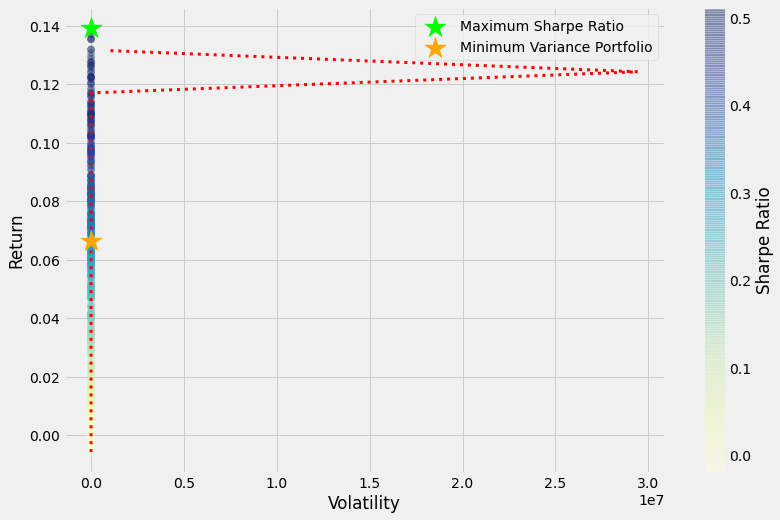

In [69]:
mvp.plot_minimum_variance_frontier(iters=500, points=20)

In [70]:
r = mvp.weights_for_return(0.04)
print(r['x'])
r

     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  2e+00  1e+00  1e+00
 1:  4.1329e-04  6.7514e+01  1e+02  1e+00  1e+00
 2:  4.2160e-04  3.1938e+07  2e+02  1e+00  1e+00
 3:  4.2168e-04  2.1611e+13  3e+05  1e+00  1e+00
Terminated (singular KKT matrix).
[ 1.00e+00]
[-9.86e-01]



{'x': <2x1 matrix, tc='d'>,
 'y': <2x1 matrix, tc='d'>,
 's': <2x1 matrix, tc='d'>,
 'z': <2x1 matrix, tc='d'>,
 'status': 'unknown',
 'gap': 317252.77805612877,
 'relative gap': 1.4680267818467906e-08,
 'primal objective': 0.00042167957952646143,
 'dual objective': 21610830400316.13,
 'primal infeasibility': 1.3937628737026684,
 'dual infeasibility': 1.393831601448487,
 'primal slack': 1.0000000000000027e-06,
 'dual slack': 78.93821934815583,
 'iterations': 3}

In [71]:
import numpy as np
from cvxopt import matrix, solvers

test = df.pivot_table(index='Date',
                      values='Close',
                      columns='ticker')
ret_mat = test.pct_change()

np.array([np.ones(ret_mat.shape[1]), ret_mat.mean().values]).T

array([[ 1.00000000e+00,  5.52956435e-04],
       [ 1.00000000e+00, -2.58506348e-05]])

In [72]:
np.array([[-1,0],[0,-1],[-1,-3],[2,5],[3,4]])
np.diag([1,0])

array([[1, 0],
       [0, 0]])

In [73]:
np.array([np.ones((1, ret_mat.shape[1])).flatten(), ret_mat.mean().values.flatten()])

array([[ 1.00000000e+00,  1.00000000e+00],
       [ 5.52956435e-04, -2.58506348e-05]])

In [74]:
P = matrix(ret_mat.cov().values, tc='d')
q = matrix(np.zeros((ret_mat.shape[1], 1)), tc='d')
# G = matrix(np.eye(log_ret.shape[1]) * -1, tc='d')
G = matrix(np.vstack([np.diag([-1 for _ in range(ret_mat.shape[1])]), np.eye(ret_mat.shape[1])]), tc='d')
h = matrix(np.hstack([np.zeros(ret_mat.shape[1]), np.ones(ret_mat.shape[1])]), tc='d')
A = matrix(np.vstack([np.ones((1, ret_mat.shape[1])), ret_mat.mean().values]), tc='d')
# A = matrix(np.ones((1, log_ret.shape[1])))
# b = matrix(np.array([[1], [ret_val]]), tc='d')
b = matrix([1.0, 0.1], tc='d')

In [75]:
print(P)
P

[ 2.92e-04  7.81e-05]
[ 7.81e-05  2.92e-04]



<2x2 matrix, tc='d'>

In [76]:
print(q)
q

[ 0.00e+00]
[ 0.00e+00]



<2x1 matrix, tc='d'>

In [77]:
print(G)
G

[-1.00e+00  0.00e+00]
[ 0.00e+00 -1.00e+00]
[ 1.00e+00  0.00e+00]
[ 0.00e+00  1.00e+00]



<4x2 matrix, tc='d'>

In [78]:
print(h)
h

[ 0.00e+00]
[ 0.00e+00]
[ 1.00e+00]
[ 1.00e+00]



<4x1 matrix, tc='d'>

In [79]:
print(A)
A

[ 1.00e+00  1.00e+00]
[ 5.53e-04 -2.59e-05]



<2x2 matrix, tc='d'>

In [80]:
print(b)
b

[ 1.00e+00]
[ 1.00e-01]



<2x1 matrix, tc='d'>

In [81]:
G = matrix(np.vstack([np.diag([-1 for _ in range(ret_mat.shape[1])]), np.eye(ret_mat.shape[1])]), tc='d')
h = matrix(np.hstack([np.zeros(ret_mat.shape[1]), np.ones(ret_mat.shape[1])]), tc='d')

In [82]:
print(G)
G

[-1.00e+00  0.00e+00]
[ 0.00e+00 -1.00e+00]
[ 1.00e+00  0.00e+00]
[ 0.00e+00  1.00e+00]



<4x2 matrix, tc='d'>

In [83]:
print(h)
h

[ 0.00e+00]
[ 0.00e+00]
[ 1.00e+00]
[ 1.00e+00]



<4x1 matrix, tc='d'>

In [84]:
np.all(np.linalg.eigvals(ret_mat.cov().values) >= 0)

True